Task Week 1. 

[Introduction to Pandas](https://bitbucket.org/hrojas/learn-pandas) 
could be found directly by clicking this link.


In [109]:
import numpy as np
import pandas as pd
import re

data = pd.read_csv('titanic.csv', index_col = 'PassengerId')

# 1. Number of men and women
men_numb = np.sum(data['Sex'] == 'male')
women_numb = np.sum(data['Sex'] == 'female')

with open('1.txt', 'w') as f:
    f.write(' '.join(map( lambda x: str(x), [men_numb, women_numb])))

# 2. Survive percentage
sur = np.sum(data['Survived'] == 1)
total_numb = data['Survived'].shape[0]
sur_percent = float(sur) / float(total_numb) * 100

ans = '{0:.2f}'.format(sur_percent)
with open('2.txt', 'w') as f:
    f.write(ans)


# Percentage of passengers in first class
p1_class_numb = np.sum(data['Pclass'] == 1)
p1_class_percent = float(p1_class_numb) / float(total_numb) * 100

ans = '{0:.2f}'.format(p1_class_percent)
with open('3.txt', 'w') as f:
    f.write(ans)

# Mean age and median of passengers
avg_age = data['Age'].mean()
mean_age = data['Age'].median()

ans = '{0:.2f} '.format(avg_age) + str(mean_age)
with open('4.txt', 'w') as f:
    f.write(ans)

# Correlation coefficient
cor = data['SibSp'].corr(data['Parch'])
ans = '{0:.2f} '.format(cor)
with open('5.txt', 'w') as f:
    f.write(ans)

# The most popular women name
women_mask = data['Sex'] == 'female'
a = list(data['Name'][women_mask].copy())

for i in range(len(a)):
    a[i] = re.split(r'(Miss.|Mrs|Mrs.|Mme.|Ms.|Mlle.|the Countess. of|Dr.)', a[i])[2]
    a[i] = re.split(r' ', a[i])[1]
    a[i] = re.sub('[)(]', '', a[i])

df = pd.DataFrame(a, columns = ['First name'])
# Index 1 because with 0 index we obtain MAN (Why - I don't know)
most_freq_name = df['First name'].value_counts().index[1]

with open('6.txt', 'w') as f:
    f.write(most_freq_name)

Week 1. Task 2.
[Creation of Decision Tree](http://scikit-learn.org/stable/modules/tree.html).

Below we obtain feature importance of survieved peoples on Titanic.

In [110]:
import numpy as np
import pandas as pd
from sklearn import tree

nes_columns = {'Pclass', 'Fare', 'Age', 'Sex', 'Survived'}

df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df_features = df.drop(set(df.columns) - nes_columns, axis = 1).copy()
df_features['Sex'] = (df_features['Sex'] == 'male')

# Remove raws with NaN values
df_features = df_features.dropna(axis = 0)

# Create prediction output
df_sur = pd.DataFrame(df_features['Survived'].copy(), columns = ['Survived'])
df_features = df_features.drop(['Survived'], axis = 1)

# Create features matrix
X = df_features.as_matrix()
# Create expecting output matrix
y = df_sur.as_matrix()

# Create and lean desicion tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Obtain feature importances
importances = clf.feature_importances_

# Find two main of them and write to output file
max_importances_ids = importances.argsort()[-2:]
res_features = ' '.join(df_features.columns[max_importances_ids].values)

print('Features: ' + res_features)

with open('feature_importance.txt', 'w') as out:
    out.write(res_features)    

Features: Sex Fare


Основные функции pandas

read_csv()

df.to_csv()

df.sort_values()

a = df.groupby() - группирует по уникальнымм значениям столбца (уже создает объект, то есть можно писать потом a.mean(), a.sum(), a.std())

Можно просто потроить гистограмму.
n.mean('Names').plot.bar()
plt.show()

df['State'].unique() - уникальные ключи в выбранном поле
df['State'] = df.State.apply(lambda x: x.upper())

df.loc['12'] - выберает строку 12 в нашей таблице, то есть это как оператор []

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


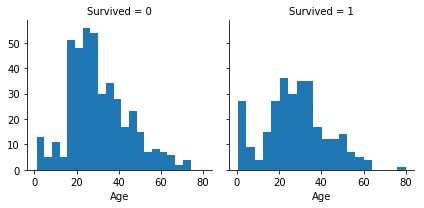

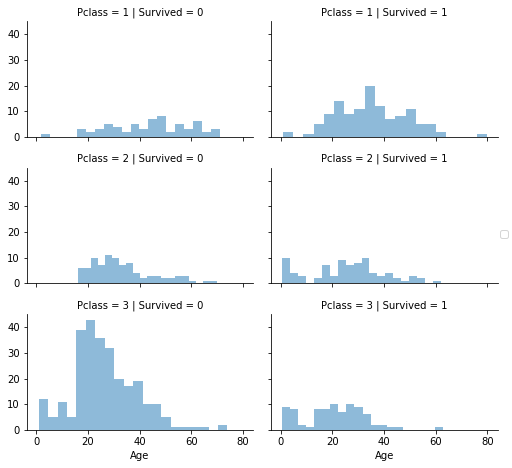

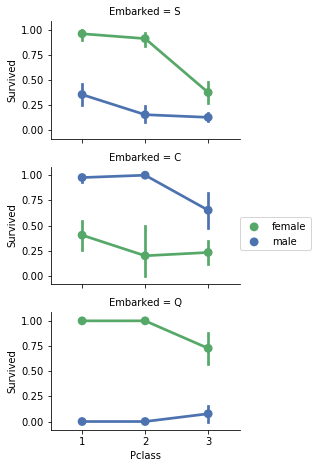

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('titanic_train.csv', index_col = 'PassengerId')
test_df = pd.read_csv('titanic_test.csv')

print(train_df.columns.values)

#train_df.head()
#train_df.info()
#train_df.describe() # distribution of numnerical features
train_df.describe(include=['O']) # distribution of catogorized features



train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()
#train_df[['Sex', 'Survived']].groupby(['Sex']).mean()
#train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

g = sns.FacetGrid(train_df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

plt.show()

    Names  Year  Avg diff
0     MAX  1958      35.3
1    ALEX  2021      27.7
2     BOB  1992       1.3
3     BOB  2004      10.7
4    ALEX  2000       6.7
5     MAX  2013      19.7
6    ALEX  1976      17.3
7     MAX  1975      18.3
8    ALEX  1999       5.7
9  DMITRI  1995       1.7


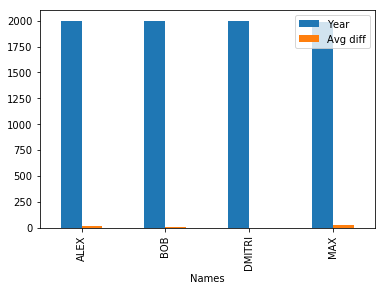

In [111]:
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt

list_len = 10

names = ['Bob', 'Alex', 'Dmitri', 'Andrew', 'Max']

l_names = [names[rnd.randint(0, len(names)-1)] for i in range(list_len)]
l_years = np.random.normal(2000, 20, list_len)

data = zip(l_names, l_years)

df = pd.DataFrame(data, columns = ['Names', 'Year'])
# Apply round() function to all coulmn to convert from double to int
df['Year'] = df['Year'].apply(lambda x : int(round(x)))
df['Names'] = df['Names'].apply(lambda x : x.upper())
# Add column
df['Avg diff'] = np.abs(df['Year'] - df['Year'].mean())

print(df)

n = df.groupby('Names')
n.mean().plot.bar()
plt.show()

#df['Year'].plot(figsize= (10,5))
plt.show()

In [112]:
a = np.arange(10)
b = a**2
c = pd.DataFrame(zip(a,b), columns = ['Value', 'SQ'])
print(c)
c.loc[1]['SQ'] = 100
d = pd.DataFrame(c['SQ'].copy(), columns = ['SQ'])



X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


   Value  SQ
0      0   0
1      1   1
2      2   4
3      3   9
4      4  16
5      5  25
6      6  36
7      7  49
8      8  64
9      9  81
